In [6]:
import numpy as np
import PIL as image
import cv2 as cv2
import matplotlib.pyplot as plt


In [15]:
babon_img = cv2.imread('baboon.jpg')
img_rgb =cv2.cvtColor(babon_img, cv2.COLOR_BGR2RGB )


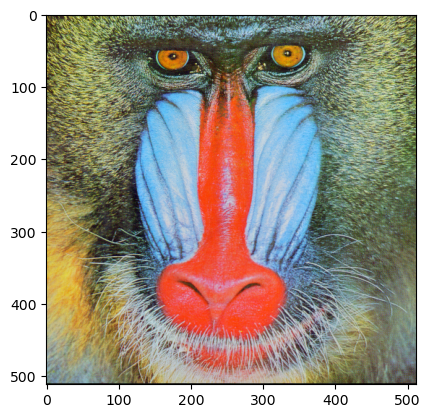

In [16]:
plt.imshow(img_rgb)

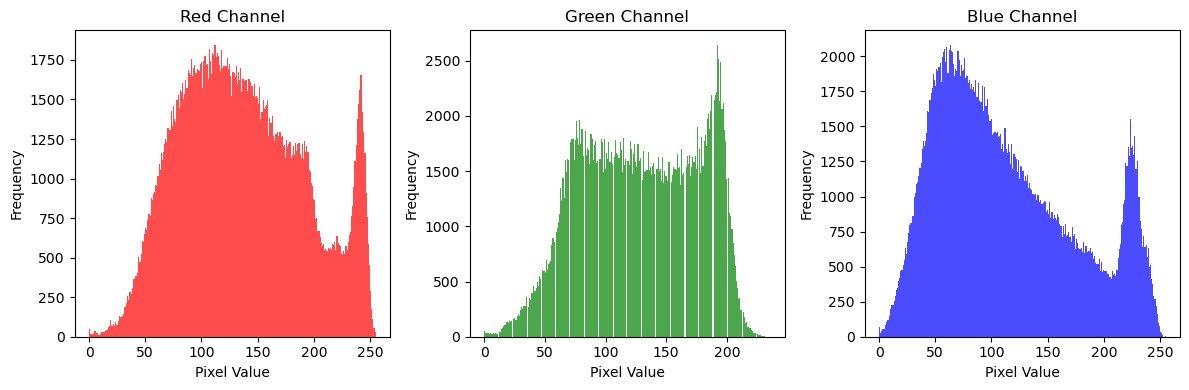

In [184]:
plt.figure(figsize=(12, 4))
r, g, b = cv2.split(img_rgb)
plt.subplot(1, 3, 1)
plt.hist(r.ravel(), bins=256, color='red', alpha=0.7)
plt.title('Red Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(g.ravel(), bins=256, color='green', alpha=0.7)
plt.title('Green Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(b.ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Blue Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

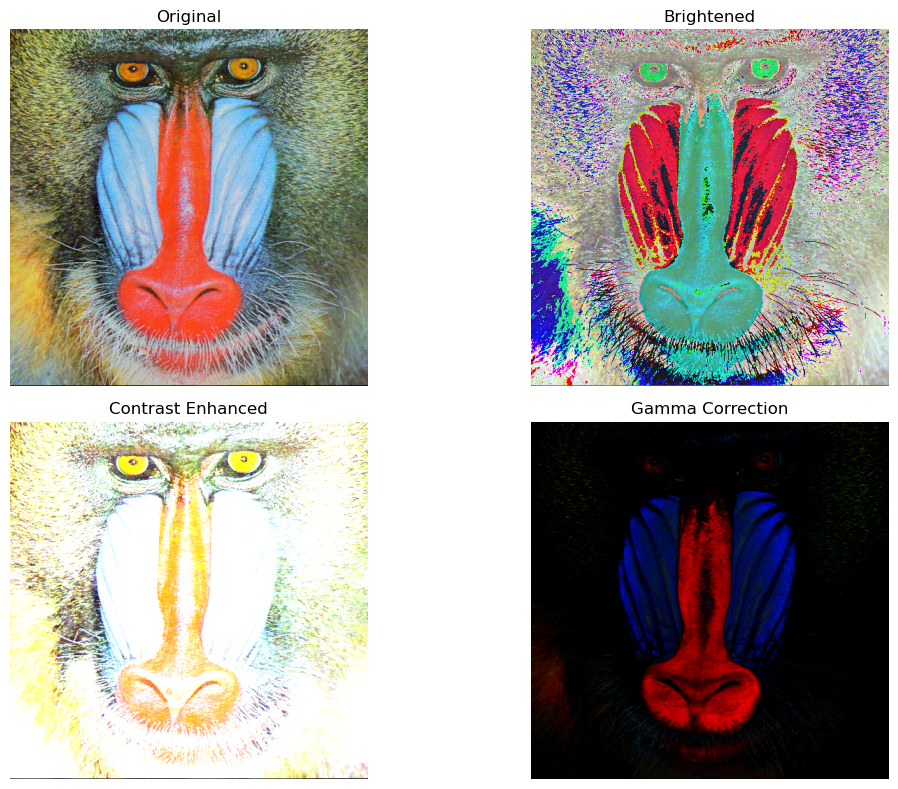

In [103]:
bright_img = np.clip(img_rgb + 91, 0, 255).astype(np.uint8)
contrast_img = cv2.convertScaleAbs(img_rgb, alpha=2.9, beta=0)

gamma = .090 

inv_gamma = 1.0 / gamma
table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
gamma_img = cv2.LUT(img_rgb, table)
plt.figure(figsize=(12,8))
plt.subplot(2,2,1); plt.imshow(img_rgb); plt.title("Original"); plt.axis("off")
plt.subplot(2,2,2); plt.imshow(bright_img); plt.title("Brightened"); plt.axis("off")
plt.subplot(2,2,3); plt.imshow(contrast_img); plt.title("Contrast Enhanced"); plt.axis("off")
plt.subplot(2,2,4); plt.imshow(gamma_img); plt.title("Gamma Correction"); plt.axis("off")
plt.tight_layout()
plt.show()

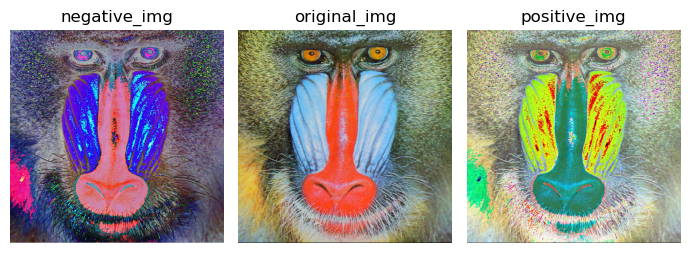

In [171]:
negative_img = 200 - img_rgb
positive_img = 55 + img_rgb
plt.figure(figsize=(7, 5))

plt.subplot(1,3,1)
plt.imshow(negative_img)
plt.axis('off')
plt.title('negative_img')

plt.subplot(1,3,2)
plt.imshow(img_rgb)
plt.title('original_img')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(positive_img)
plt.title('positive_img')
plt.axis('off')

plt.tight_layout()
plt.show()


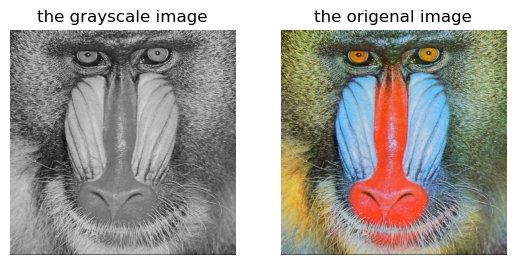

In [122]:
img_gray =cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.subplot(1,2,1)
plt.imshow(img_gray, cmap='gray',vmin=0, vmax=255)
plt.title('the grayscale image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img_rgb)
plt.title('the origenal image')
plt.axis('off')


plt.show()

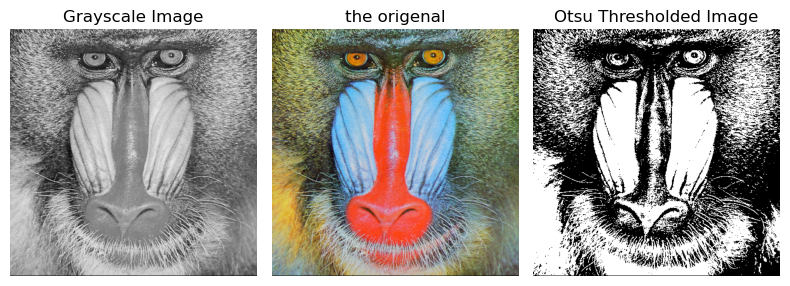

In [182]:
# Otsu's thresholding(it used only for the gray_scale)show as: (threshold value ,array)
otsu_val, otsu_thresh = cv2.threshold(img_gray, 0, 255,  cv2.THRESH_OTSU)

plt.figure(figsize=(8, 10))

plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(otsu_thresh, cmap='gray')
plt.title('Otsu Thresholded Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_rgb)
plt.title('the origenal')
plt.axis('off')

plt.tight_layout()
plt.show()


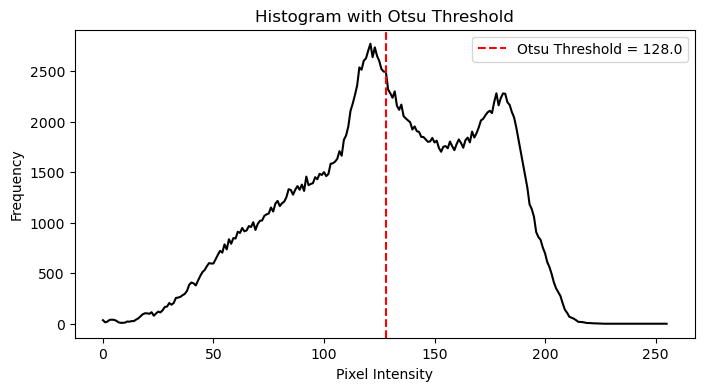

In [183]:
hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])

plt.figure(figsize=(8, 4))
plt.plot(hist, color='black')
plt.axvline(x=otsu_val, color='red', linestyle='--', label=f'Otsu Threshold = {otsu_val}')
plt.title('Histogram with Otsu Threshold')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()
